---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    %matplotlib notebook

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

<IPython.core.display.Javascript object>

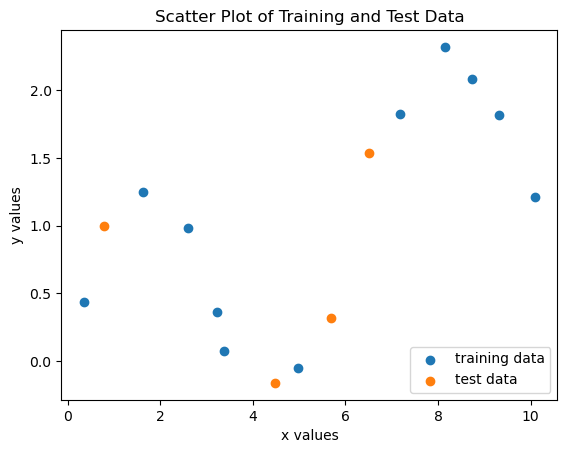

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline


# Generate random data
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 6 + np.random.randn(n) / 10

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Scatter plot function
def part1_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("Scatter Plot of Training and Test Data")
    plt.show()  # Show plot interactively

# Call the function
part1_scatter()


### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

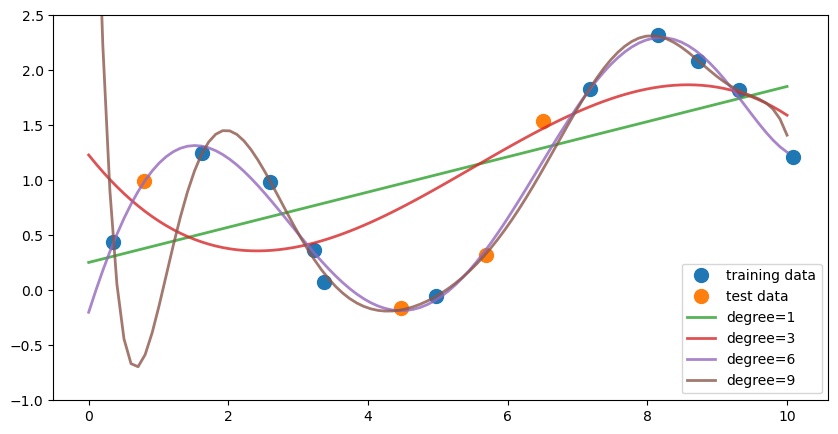

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Data generation
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 6 + np.random.randn(n) / 10

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Function to calculate predictions
def answer_one():
    result = np.zeros((4, 100))
    test = np.linspace(0, 10, 100)
    for i, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(test.reshape(-1, 1)))
        result[i, :] = y
    return result

# Function to plot results
def plot_one(degree_predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i, degree in enumerate([1, 3, 6, 9]):
        plt.plot(np.linspace(0, 10, 100),
                 degree_predictions[i],
                 alpha=0.8,
                 lw=2,
                 label=f'degree={degree}')
    plt.ylim(-1, 2.5)
    plt.legend(loc=4)
    plt.show()

# Call the functions
plot_one(answer_one())

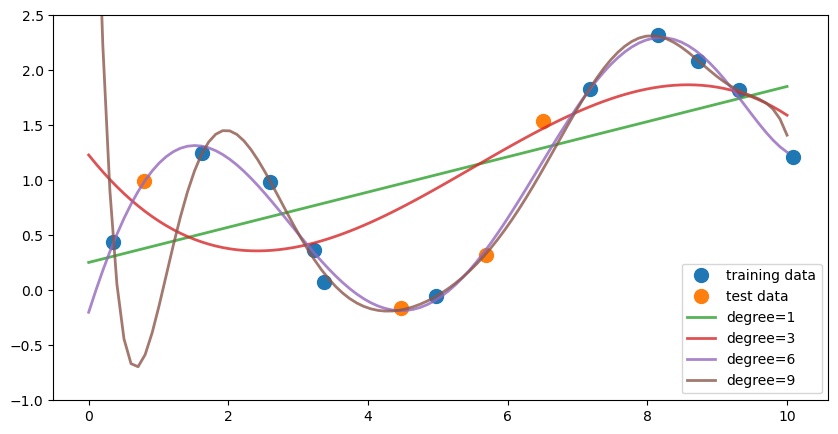

In [20]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [21]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np

    r2_test = np.zeros(10)
    r2_train = np.zeros(10)
    for degree in range(10):
        # Train polynomial linear regression
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_poly, y_train)

        # Evaluate the polynomial linear regression
        r2_train[degree] = linreg.score(X_train_poly, y_train)

        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        r2_test[degree] = linreg.score(X_test_poly, y_test)

    return (r2_train, r2_test)

# Call the function
r2_train, r2_test = answer_two()
print("R^2 values for training set:", r2_train)
print("R^2 values for test set:", r2_test)

R^2 values for training set: [0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
R^2 values for test set: [-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247942 -0.64525285]


### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

(0, 9, 7)

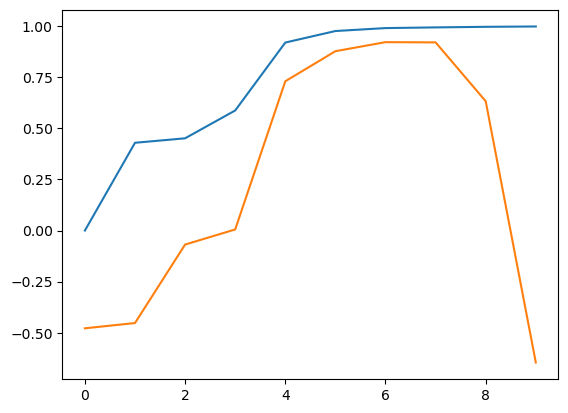

In [22]:
def plot_answer_three():
    import matplotlib.pyplot as plt
    r2_train, r2_test = answer_two()
    degrees = np.arange(0, 10)
    plt.figure()
    plt.plot(degrees, r2_train, degrees, r2_test)


plot_answer_three()

def answer_three():
    Underfitting, Overfitting, Good_Generalization = 0, 9, 7
    return (Underfitting, Overfitting, Good_Generalization)

answer_three()

In [23]:
def answer_three():
    Underfitting, Overfitting, Good_Generalization = 0, 9, 7
    return (Underfitting, Overfitting, Good_Generalization)
answer_three()

(0, 9, 7)

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [29]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression, Lasso
    from sklearn.metrics import r2_score
    import numpy as np

    # Generate polynomial features of degree 12
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    # Train a non-regularized LinearRegression model
    linreg = LinearRegression().fit(X_train_poly, y_train)

    # Train a Lasso Regression model with specified parameters
    linlasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1, random_state=0).fit(X_train_poly, y_train)

    # Calculate R^2 scores on the test set for both models
    linreg_r2 = linreg.score(X_test_poly, y_test)
    linlasso_r2 = linlasso.score(X_test_poly, y_test)

    return linreg_r2, linlasso_r2

# Call the function (ensure X_train, X_test, y_train, and y_test are defined beforehand)
# answer_four()

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv("assets/mushrooms.csv")
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:, 2:]
y_mush = mush_df2.iloc[:, 1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2


### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

In [26]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Fit a DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

    # Create a DataFrame for feature importance
    df = pd.DataFrame({
        'feature': X_train2.columns.values,
        'feature_importance': clf.feature_importances_
    })

    # Sort by feature importance in descending order and get the top 5 features
    top_features = df.sort_values(by='feature_importance', ascending=False)['feature'].head(5).tolist()
    
    return top_features

# Call the function
# answer_five()


In [27]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    import pandas as pd

    # Train a DecisionTreeClassifier with default parameters and random_state=0
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train2, y_train2)

    # Create a DataFrame for feature importance
    feature_importances = pd.DataFrame({
        'feature': X_train2.columns,
        'importance': clf.feature_importances_
    })

    # Sort by importance in descending order and select the top 5 features
    top_features = (feature_importances
                    .sort_values(by='importance', ascending=False)
                    .head(5)['feature']
                    .tolist())

    return top_features

# Call the function and print the result
result = answer_five()
print("Top 5 Most Important Features:", result)

Top 5 Most Important Features: ['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [37]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                            n_redundant=0, random_state=0, class_sep=1.5)

# Subset for validation curve analysis
X_subset = X[:50]
y_subset = y[:50]

def answer_six():
    # Create SVC with default parameters
    svc = SVC(kernel='rbf', C=1, random_state=0)

    # Define gamma values
    param_range = np.logspace(-4, 1, 6)

    # Perform validation curve
    train_scores, test_scores = validation_curve(
        svc,
        X_subset,
        y_subset,
        param_name='gamma',
        param_range=param_range,
        scoring='accuracy',
        cv=3,
        n_jobs=2
    )

    # Compute mean scores across the folds
    train_mscores = train_scores.mean(axis=1)
    test_mscores = test_scores.mean(axis=1)

    return (train_mscores, test_mscores)

# Call the function
train_scores, test_scores = answer_six()

# Print the results
print(train_scores)
print(test_scores)


[0.51990493 0.51990493 0.9402852  0.96999406 0.96999406 1.        ]
[0.51960784 0.51960784 0.95955882 0.95955882 0.91911765 0.75857843]


### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [10]:
def answer_seven():
    
    #train_scores, test_scores = answer_six()
    #plt.figure()
    #plt.plot(np.logspace(-4,1,6),train_scores,'b',label='Training scores')
    #plt.plot(np.logspace(-4,1,6),test_scores,'r',label='Test scores')
    #plt.xscale('log') # Sets x axis to a log scale.
    #plt.xlabel('Gamma')
    #plt.ylabel('Scores')
    #plt.legend()
    
    return (0.0001,10,0.1) 

answer_seven()

(0.0001, 10, 0.1)